<a href="https://colab.research.google.com/github/mianguevara/Acamica/blob/main/DS_Proyecto_03_ST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto 03 - Series de Tiempo

## Dataset: Flujo Vehicular por Unidades de Peaje AUSA

**Recuerda descargar el dataset de [aquí](https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-peaje-ausa). Deberás descargar -  al menos para comenzar - los años 2017, 2018 y 2019.**

En este notebook te dejamos unas celdas para que puedas comenzar a trabajar con este dataset para los años 2017, 2018 y 2019. Si deseas utilizar otros años, ten en cuenta que deberás hacer el preprocesamiento correspondiente, ya que la estructura de los datos puede variar.

**Importante:** Para el proyecto, debes comenzar con los datos de la autopista Illia, pago en Efectivo.

### Exploración de datos

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿Cuáles son los días y horarios de mayor tráfico? También, estudia autocorrelaciones, resampleos, etc.

#### Componentes de la serie

1. Calcula las componentes estacionales y tendencia de la serie. Interpreta los resultados, si es necesario con información auxiliar (por fuera del dataset) o elementos del dataset que no estés utilizando (por ejemplo, si la tendencia es negativa, ¿puede ser porque se migre a otras formas de pago?).
1. ¿La serie posee valores atípicos? Si es así, interpreta, si es necesario con información auxiliar. **Pista**: primer semestre 2019.

### Predicción a Futuro

Debes implementar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019. 

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada tus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo. 
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?
1. Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona?
1. Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados?

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?
1. ¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

### 1. Preparación del Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [ ]:
data_2019 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Acamica/Proyecto 3/flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Acamica/Proyecto 3/flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Acamica/Proyecto 3/flujo-vehicular-2017.csv', sep =',')

In [ ]:
data_2019.info()
data_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16


In [ ]:
data_2018.info()
data_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,NO COBRADO,29
1,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,TELEPASE,9
2,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,NO COBRADO,73
3,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,TELEPASE,39
4,2018,2018-01-01,2,3,Lunes,Alberdi,Centro,Liviano,NO COBRADO,115


In [ ]:
data_2017.info()
data_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,NO COBRADO,25
1,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,TELEPASE,7
2,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,NO COBRADO,5
3,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,2
4,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,94


Investiguemos que valores toman los campos **estacion, sentido, tipo_vehiculo y forma_pago**

In [ ]:
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())

['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [ ]:
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [ ]:
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())

['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [ ]:
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']


##### Podemos decir entonces que los años 2017, 2018 y 2019 tienen las siguientes columnas con la siguiente información:

**periodo**: año del dset 

**fecha**: año dia mes

**hora_inicio** hora de inicio de la cuenta de vehiculos (DROP)

**hora_fin** hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)

**dia**: dia de la semana 

**estacion**: estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes habia Dellepiane Liniers y Centro, y se agrega PDB)

**sentido**: Centro o Provincia

**tipo_vehiculo**: Liviano o Pesado

**forma_pago**: Hay varias y varian entre los años.

**cantidad_pasos**: Cantidad de vehiculos

Vamos a estar trabajando con la estación **Illia** y la forma de pago **Efectivo**


In [ ]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO')
dataset = dataset[mask]

#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset.head()

,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos
80,2019-01-01,2,Martes,Centro,Liviano,537
86,2019-01-01,2,Martes,Centro,Pesado,1
88,2019-01-01,2,Martes,Provincia,Liviano,443
94,2019-01-01,2,Martes,Provincia,Pesado,1
149,2019-01-01,3,Martes,Centro,Liviano,769


In [ ]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset.drop(columns=['fecha','hora_fin'], inplace = True)

dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha2
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [ ]:
#Corregimos el nombre de fecha2 a fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [ ]:
#Reordenamos el dataset por fecha
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)
dataset

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
1,Domingo,Provincia,Liviano,9,2017-01-01 00:00:00
2,Domingo,Provincia,Liviano,644,2017-01-01 00:00:00
3,Domingo,Provincia,Pesado,6,2017-01-01 00:00:00
4,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
...,...,...,...,...,...
238864,Martes,Provincia,Liviano,556,2019-12-31 22:00:00
238865,Martes,Provincia,Pesado,1,2019-12-31 22:00:00
238866,Martes,Centro,Liviano,580,2019-12-31 22:00:00
238867,Martes,Centro,Liviano,214,2019-12-31 23:00:00


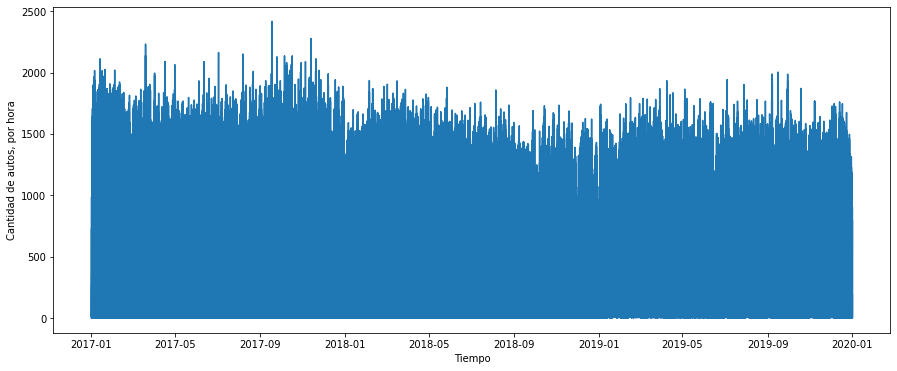

In [ ]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(dataset.fecha, dataset.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

In [ ]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario = dataset.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(1095, 1)


,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486


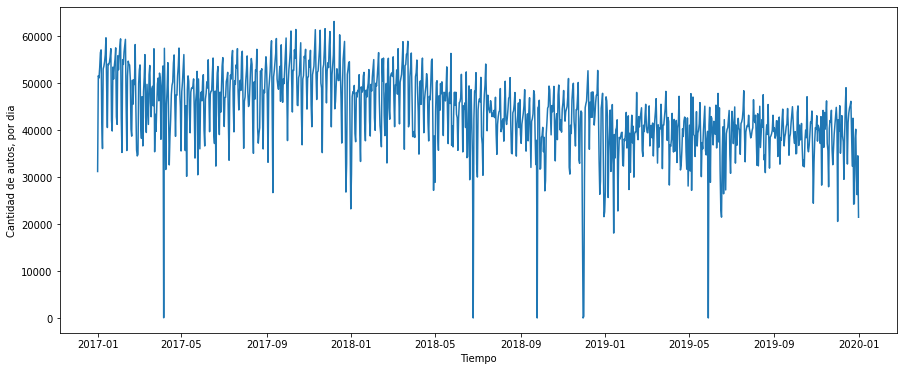

In [ ]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

In [ ]:
# Una mascara para filtrar cada dia de la semana

#Lunes
mask_day=diario.index.dayofweek==0
dataset_monday = diario[mask_day]
#Martes
mask_day=diario.index.dayofweek==1
dataset_tuesday = diario[mask_day]
#Miercoles
mask_day=diario.index.dayofweek==2
dataset_wednesday = diario[mask_day]
#Jueves
mask_day=diario.index.dayofweek==3
dataset_thursday = diario[mask_day]
#Viernes
mask_day=diario.index.dayofweek==4
dataset_friday = diario[mask_day]
#Sabado
mask_day=diario.index.dayofweek==5
dataset_saturday = diario[mask_day]
#Domingo
mask_day=diario.index.dayofweek==6
dataset_sunday = diario[mask_day]


Se observara el dataset, de ahora en adelante por dias especificos de la semana, es decir un dataset para cada dia de la semana.

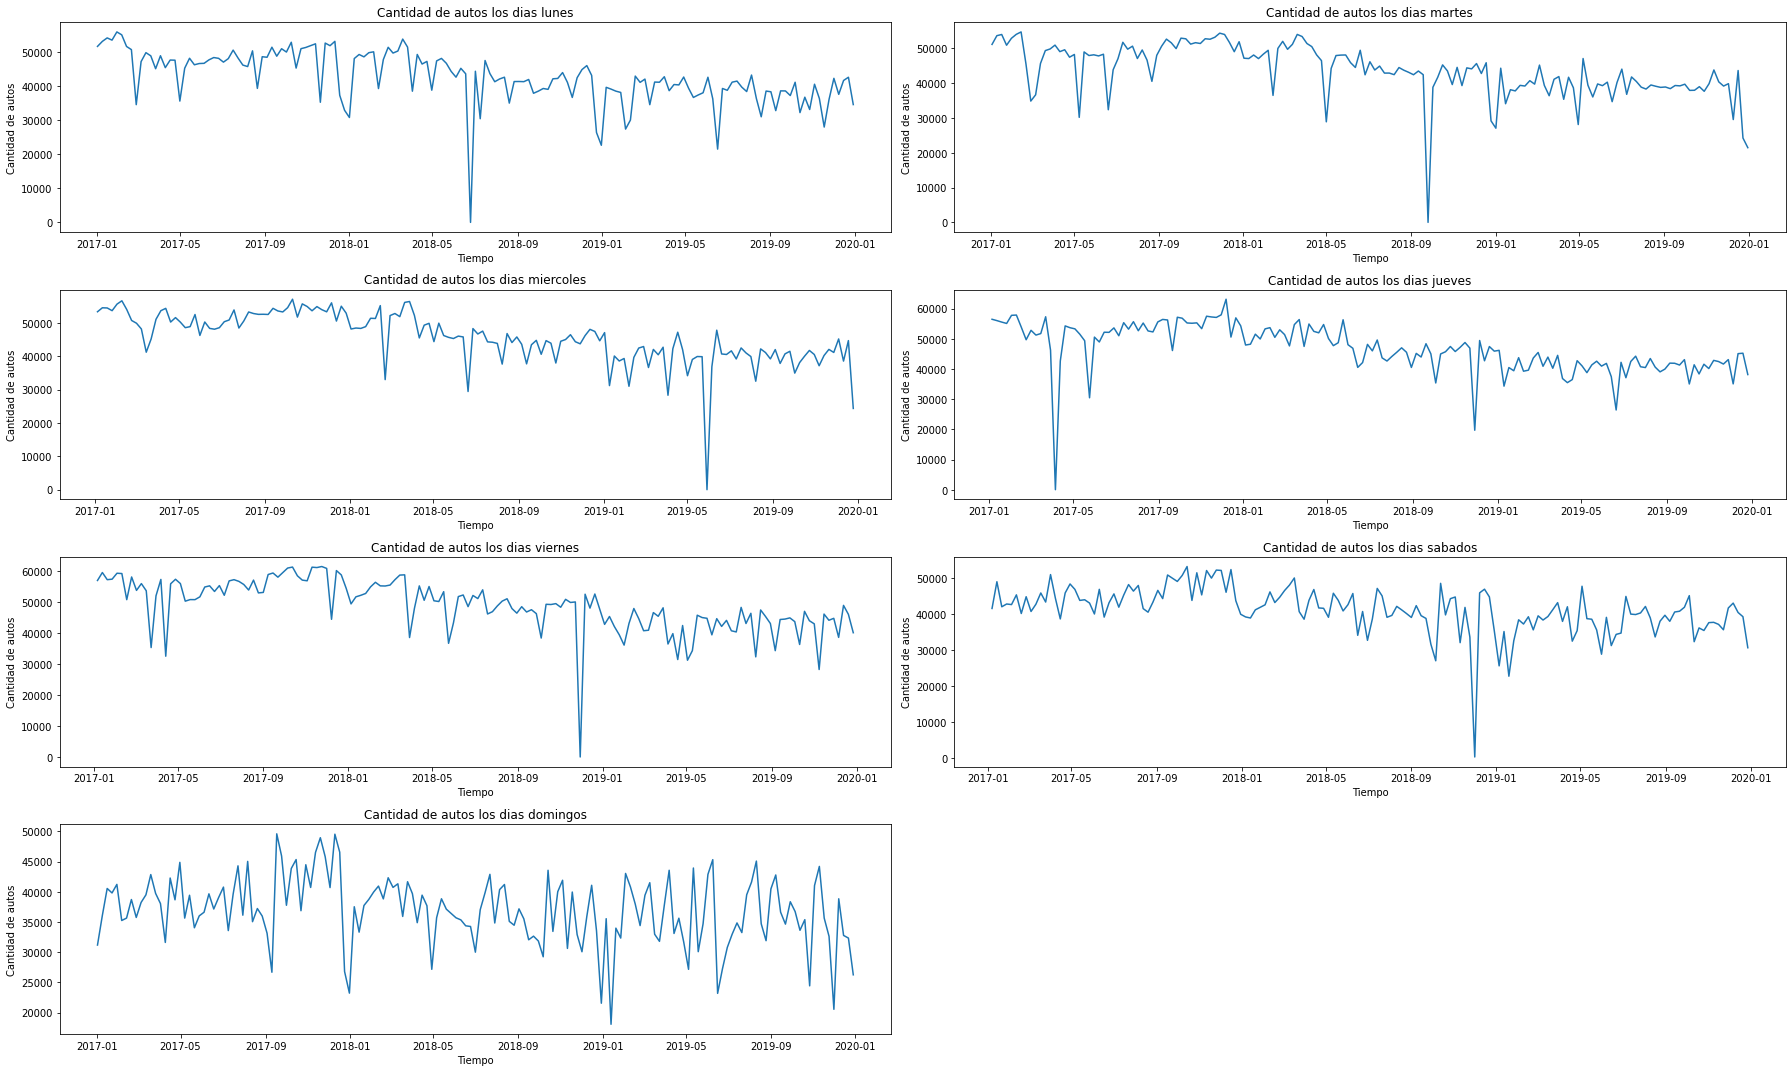

In [ ]:
#Se grafica el comportamiento de la variable cantidad de pasos para cada dia de la semana

plt.figure(figsize = (25,15))

plt.subplot(4,2,1)
plt.plot(dataset_monday.index, dataset_monday.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos')
plt.title('Cantidad de autos los dias lunes')

plt.subplot(4,2,2)
plt.plot(dataset_tuesday.index, dataset_tuesday.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos')
plt.title('Cantidad de autos los dias martes')

plt.subplot(4,2,3)
plt.plot(dataset_wednesday.index, dataset_wednesday.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos')
plt.title('Cantidad de autos los dias miercoles')

plt.subplot(4,2,4)
plt.plot(dataset_thursday.index, dataset_thursday.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos')
plt.title('Cantidad de autos los dias jueves')

plt.subplot(4,2,5)
plt.plot(dataset_friday.index, dataset_friday.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos')
plt.title('Cantidad de autos los dias viernes')

plt.subplot(4,2,6)
plt.plot(dataset_saturday.index, dataset_saturday.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos')
plt.title('Cantidad de autos los dias sabados')

plt.subplot(4,2,7)
plt.plot(dataset_sunday.index, dataset_sunday.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos')
plt.title('Cantidad de autos los dias domingos')

plt.tight_layout()
plt.show()

In [ ]:
print('Cantidad de autos los dias lunes: '+str(int(dataset_monday.cantidad_pasos.sum())))
print('Cantidad de autos promedio los dias lunes: '+str(int(dataset_monday.cantidad_pasos.mean())))
print('-------------------------------------------------------------------------------')
print('Cantidad de autos los dias martes: '+str(int(dataset_tuesday.cantidad_pasos.sum())))
print('Cantidad de autos promedio los dias martes: '+str(int(dataset_tuesday.cantidad_pasos.mean())))
print('-------------------------------------------------------------------------------')
print('Cantidad de autos los dias miercoles: '+str(int(dataset_wednesday.cantidad_pasos.sum())))
print('Cantidad de autos promedio los dias miercoles: '+str(int(dataset_wednesday.cantidad_pasos.mean())))
print('-------------------------------------------------------------------------------')
print('Cantidad de autos los dias jueves: '+str(int(dataset_thursday.cantidad_pasos.sum())))
print('Cantidad de autos promedio los dias jueves: '+str(int(dataset_thursday.cantidad_pasos.mean())))
print('-------------------------------------------------------------------------------')
print('Cantidad de autos los dias viernes: '+str(int(dataset_friday.cantidad_pasos.sum())))
print('Cantidad de autos promedio los dias viernes: '+str(int(dataset_friday.cantidad_pasos.mean())))
print('-------------------------------------------------------------------------------')
print('Cantidad de autos los dias sabado: '+str(int(dataset_saturday.cantidad_pasos.sum())))
print('Cantidad de autos promedio los dias sabado: '+str(int(dataset_saturday.cantidad_pasos.mean())))
print('-------------------------------------------------------------------------------')
print('Cantidad de autos los dias domingo: '+str(int(dataset_sunday.cantidad_pasos.sum())))
print('Cantidad de autos promedio los dias domingo: '+str(int(dataset_sunday.cantidad_pasos.mean())))

Cantidad de autos los dias lunes: 6691387
Cantidad de autos promedio los dias lunes: 42620
-------------------------------------------------------------------------------
Cantidad de autos los dias martes: 6865551
Cantidad de autos promedio los dias martes: 43729
-------------------------------------------------------------------------------
Cantidad de autos los dias miercoles: 7125526
Cantidad de autos promedio los dias miercoles: 45676
-------------------------------------------------------------------------------
Cantidad de autos los dias jueves: 7302169
Cantidad de autos promedio los dias jueves: 46808
-------------------------------------------------------------------------------
Cantidad de autos los dias viernes: 7647272
Cantidad de autos promedio los dias viernes: 49020
-------------------------------------------------------------------------------
Cantidad de autos los dias sabado: 6441715
Cantidad de autos promedio los dias sabado: 41293
------------------------------------

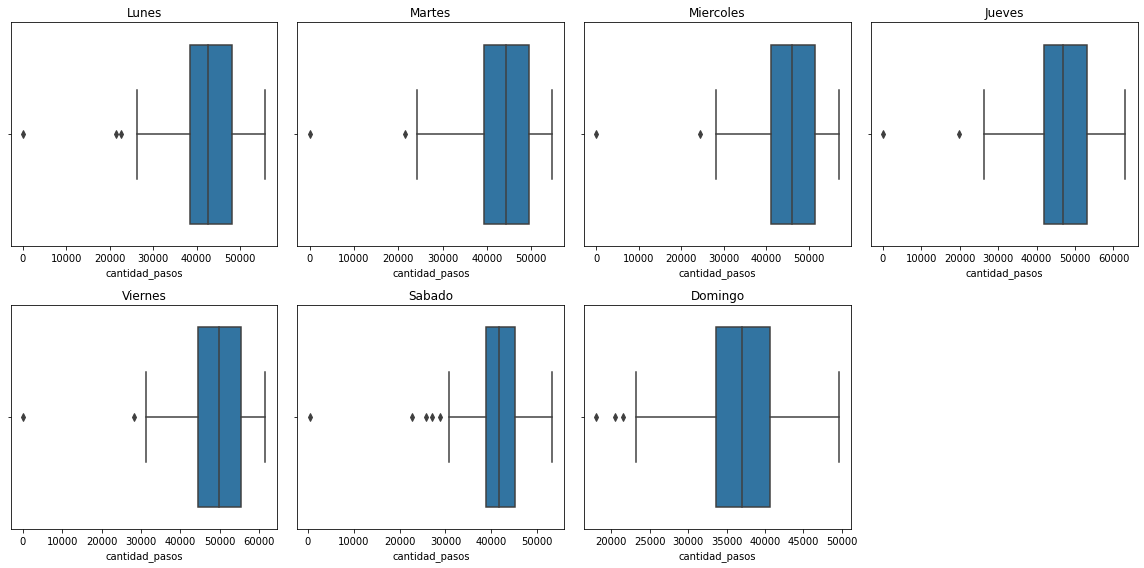

In [ ]:
#Se observa los boxplot de cada dataset de los dias de la semana

import seaborn as sns
import warnings; warnings.simplefilter('ignore')

plt.figure(figsize = (16,8))

plt.subplot(2,4,1)
sns.boxplot(dataset_monday.cantidad_pasos.values)
plt.xlabel('cantidad_pasos')
plt.title('Lunes')

plt.subplot(2,4,2)
sns.boxplot(dataset_tuesday.cantidad_pasos.values)
plt.xlabel('cantidad_pasos')
plt.title('Martes')

plt.subplot(2,4,3)
sns.boxplot(dataset_wednesday.cantidad_pasos.values)
plt.xlabel('cantidad_pasos')
plt.title('Miercoles')

plt.subplot(2,4,4)
sns.boxplot(dataset_thursday.cantidad_pasos.values)
plt.xlabel('cantidad_pasos')
plt.title('Jueves')

plt.subplot(2,4,5)
sns.boxplot(dataset_friday.cantidad_pasos.values)
plt.xlabel('cantidad_pasos')
plt.title('Viernes')

plt.subplot(2,4,6)
sns.boxplot(dataset_saturday.cantidad_pasos.values)
plt.xlabel('cantidad_pasos')
plt.title('Sabado')

plt.subplot(2,4,7)
sns.boxplot(dataset_sunday.cantidad_pasos.values)
plt.xlabel('cantidad_pasos')
plt.title('Domingo')

plt.tight_layout()
plt.show()

Se puede observar en los datos que los datasets de los dias lunes al sabado en orden presentan datos atipicos de valores iguales a cero, se debe proceder a borrar estos datos y cambiarlos por la media de los mismos sin estos, esto se hace debido a que a pesar de no conocer la razones de los datos atipicos si se puede concluir que un valor de cero es un dia que los peajes no estaban en funcioanmiento por x o y motivo.

In [ ]:
#Quitar el valor de cero de cada dataset de los dias de la semana y reemplazarlos por la media de estos sin los ceros

#Lunes
mean_nw=dataset_monday[dataset_monday.cantidad_pasos!=0].mean().values
dataset_monday.loc[dataset_monday.cantidad_pasos==0] = mean_nw

#Martes
mean_nw=dataset_tuesday[dataset_tuesday.cantidad_pasos!=0].mean().values
dataset_tuesday.loc[dataset_tuesday.cantidad_pasos==0]=mean_nw

#Miercoles
mean_nw=dataset_wednesday[dataset_wednesday.cantidad_pasos!=0].mean().values
dataset_wednesday.loc[dataset_wednesday.cantidad_pasos==0]=mean_nw

#Jueves
mean_nw=dataset_thursday[dataset_thursday.cantidad_pasos!=0].mean().values
dataset_thursday.loc[dataset_thursday.cantidad_pasos==0]=mean_nw

#Viernes
mean_nw=dataset_friday[dataset_friday.cantidad_pasos!=0].mean().values
dataset_friday.loc[dataset_friday.cantidad_pasos==0]=mean_nw

#Sabado
mean_nw=dataset_saturday[dataset_saturday.cantidad_pasos!=0].mean().values
dataset_saturday.loc[dataset_saturday.cantidad_pasos==0]=mean_nw


Una vez se quitan los datos de ceros, los dias jueves y sabado no presentan cambios debido a que los valores que se presumina eran ceros son valores muy cercanos mas no ceros, por este motivo se decide no borrarlos.
Nuevamente se ejecuta las celdas anteriores donde se puede obervar el grafico de las fechas vs vantidad de pasos para corroborar que no exista un dato atipico de cero y que la funcion presente una continuidad y luego la celda de los boxplot para la verificacion de lo mismo.

A continuacion se proceede a realizar un analsis de los datasets diarios o de los dias de la semana mediante su composicion additive para determinar tendencia, estacionalidad y ruido dado que la funcion observable de los datos ya se pudo obervar.

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot

result_monday = seasonal_decompose(dataset_monday.cantidad_pasos, model='additive')
result_tuesday = seasonal_decompose(dataset_tuesday.cantidad_pasos, model='additive')
result_wednesday = seasonal_decompose(dataset_wednesday.cantidad_pasos, model='additive')
result_thursday = seasonal_decompose(dataset_thursday.cantidad_pasos, model='additive')
result_friday = seasonal_decompose(dataset_friday.cantidad_pasos, model='additive')
result_saturday = seasonal_decompose(dataset_saturday.cantidad_pasos, model='additive')
result_sunday = seasonal_decompose(dataset_sunday.cantidad_pasos, model='additive')


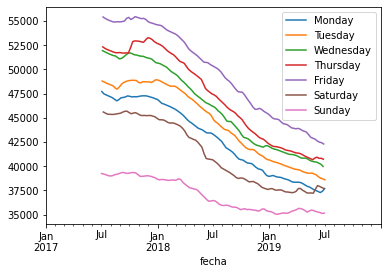

In [ ]:
#Tendencia 

result_monday.trend.plot(legend='Monday',label="Monday")
result_tuesday.trend.plot(legend='Tuesday',label="Tuesday")
result_wednesday.trend.plot(legend='Wednesday',label="Wednesday")
result_thursday.trend.plot(legend='Thursday',label="Thursday")
result_friday.trend.plot(legend='Friday',label="Friday")
result_saturday.trend.plot(legend='Saturday',label="Saturday")
result_sunday.trend.plot(legend='Sunday',label="Sunday")
pyplot.show()

Se puede observar que la tendecia de los dias es bajista, el cambio de bajada ha sido mas marcado en unos dias que en otros, por ejemplo el dia domingo ha sido menos el cambio.

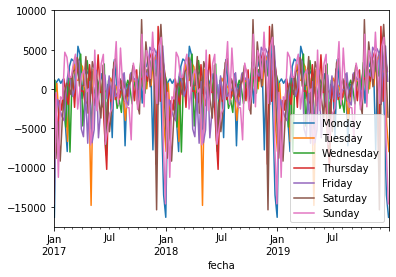

In [ ]:
#Estacionalidad

result_monday.seasonal.plot(legend='Monday',label="Monday")
result_tuesday.seasonal.plot(legend='Tuesday',label="Tuesday")
result_wednesday.seasonal.plot(legend='Wednesday',label="Wednesday")
result_thursday.seasonal.plot(legend='Thursday',label="Thursday")
result_friday.seasonal.plot(legend='Friday',label="Friday")
result_saturday.seasonal.plot(legend='Saturday',label="Saturday")
result_sunday.seasonal.plot(legend='Sunday',label="Sunday")
pyplot.show()

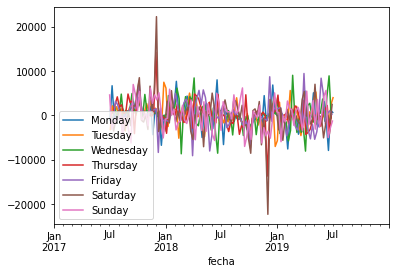

In [ ]:
#Ruido

result_monday.resid.plot(legend='Monday',label="Monday")
result_tuesday.resid.plot(legend='Tuesday',label="Tuesday")
result_wednesday.resid.plot(legend='Wednesday',label="Wednesday")
result_thursday.resid.plot(legend='Thursday',label="Thursday")
result_friday.resid.plot(legend='Friday',label="Friday")
result_saturday.resid.plot(legend='Saturday',label="Saturday")
result_sunday.resid.plot(legend='Sunday',label="Sunday")
pyplot.show()

In [ ]:
#Creacion de la variable independiente 

dataset_monday['fecha_numeros']=dataset_monday.index.map(datetime.datetime.toordinal)
dataset_tuesday['fecha_numeros']=dataset_tuesday.index.map(datetime.datetime.toordinal)
dataset_wednesday['fecha_numeros']=dataset_wednesday.index.map(datetime.datetime.toordinal)
dataset_thursday['fecha_numeros']=dataset_thursday.index.map(datetime.datetime.toordinal)
dataset_friday['fecha_numeros']=dataset_friday.index.map(datetime.datetime.toordinal)
dataset_saturday['fecha_numeros']=dataset_saturday.index.map(datetime.datetime.toordinal)
dataset_sunday['fecha_numeros']=dataset_sunday.index.map(datetime.datetime.toordinal)

In [ ]:
#Modelos de benchmark

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

days = ['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado', 'Domingo']
modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']

for i, day in enumerate([dataset_monday, dataset_tuesday, dataset_wednesday, dataset_thursday, dataset_friday, dataset_saturday, dataset_sunday]):
  X=day['fecha_numeros']
  y=day['cantidad_pasos']

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

  linear_model = LinearRegression()
  knn_regressor = KNeighborsRegressor()
  tree_regressor = DecisionTreeRegressor()

  linear_model.fit(X_train.values.reshape(-1, 1), y_train)
  knn_regressor.fit(X_train.values.reshape(-1, 1), y_train)
  tree_regressor.fit(X_train.values.reshape(-1, 1), y_train)

  print('Modelos con el dataset del dia '+days[i]+':')

  for j, model in enumerate([linear_model, knn_regressor, tree_regressor]):
    print(f'Modelo: {modelos[j]}')
    print('Score del train: '+str(model.score(X_train.values.reshape(-1, 1), y_train)))
    print('Score del test: '+str(model.score(X_test.values.reshape(-1, 1),y_test))+'\n')


Modelos con el dataset del dia Lunes:
Modelo: Regresión lineal
Score del train: 0.4327315368174455
Score del test: 0.39256197626328315

Modelo: Árbol de Decisión
Score del train: 0.5468073253614494
Score del test: 0.40843477331228983

Modelo: Vecinos más cercanos
Score del train: 1.0
Score del test: 0.2270060035876087

Modelos con el dataset del dia Martes:
Modelo: Regresión lineal
Score del train: 0.42212561561946915
Score del test: 0.4157467711651255

Modelo: Árbol de Decisión
Score del train: 0.6969817084824934
Score del test: 0.36142752491669916

Modelo: Vecinos más cercanos
Score del train: 1.0
Score del test: -0.20209372338692091

Modelos con el dataset del dia Miercoles:
Modelo: Regresión lineal
Score del train: 0.5497350332579455
Score del test: 0.5294891515440883

Modelo: Árbol de Decisión
Score del train: 0.7633026672106347
Score del test: 0.4784041825828256

Modelo: Vecinos más cercanos
Score del train: 1.0
Score del test: 0.3697420816475798

Modelos con el dataset del dia J

Se plantearon tres tipos de modelos, el primero una regresion lineal, la cual en cada dataset de los dias de la semana presenta un bajo score tanto en train como en el test, el modelo de arboles de decision es la misma suitacion y el modelo de vecinos mas cercanos tiene un sobreajuste dado que el set de entrenamiento presenta puntaje perfecto pero en el test es malisimo para predecir.
A grandes rasgos lo que se presenta con la serie de tiempo es que es dificil predecir su comporatmiento dado la alta incertidumbre que hay en el entorno, depende de mucha variables que no son medibles, o que no se tiene informacion, hay bastante ruido. 

In [ ]:
# Funcion de RandomSearch

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score

def RandomSearch(model, param_dist, n_iter, random_state,  cv):

  days = ['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado', 'Domingo']

  for i, day in enumerate([dataset_monday, dataset_tuesday, dataset_wednesday, dataset_thursday, dataset_friday, dataset_saturday, dataset_sunday]):
    X=day['fecha_numeros']
    y=day['cantidad_pasos']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

    random = RandomizedSearchCV(model, param_dist, n_iter=100, random_state=1, cv=3)

    random.fit(X_train.values.reshape(-1, 1),y_train)
    y_pred_train = random.predict(X_train.values.reshape(-1, 1))
    y_pred_test = random.predict(X_test.values.reshape(-1, 1))

    print('Modelos con el dataset del dia '+days[i]+':')

    print("Tuned Decision Tree Parameters: {}".format(random.best_params_))
    print("Best score in train is {}".format(random.best_score_))
    print("score in train {}".format(r2_score(y_train, y_pred_train)))
    print("score in test {}".format(r2_score(y_test, y_pred_test))+'\n')

In [ ]:
# RandomSearch con DecisionTreeRegressor

param_dist = {"max_features": ["auto","sqrt", "log2"],
              "criterion": ["mse", "friedman_mse", "mae", "poisson"]}
model = DecisionTreeRegressor()
n_iter = 100
random_state = 1
cv = 5

RandomSearch(model, param_dist, n_iter, random_state,  cv)

Modelos con el dataset del dia Lunes:
Tuned Decision Tree Parameters: {'max_features': 'auto', 'criterion': 'mse'}
Best score in train is 0.0984458047348498
score in train 1.0
score in test 0.2270060035876087

Modelos con el dataset del dia Martes:
Tuned Decision Tree Parameters: {'max_features': 'auto', 'criterion': 'mse'}
Best score in train is 0.27453928104690256
score in train 1.0
score in test -0.2020937233869209

Modelos con el dataset del dia Miercoles:
Tuned Decision Tree Parameters: {'max_features': 'auto', 'criterion': 'mse'}
Best score in train is 0.4504888174229425
score in train 1.0
score in test 0.3697420816475798

Modelos con el dataset del dia Jueves:
Tuned Decision Tree Parameters: {'max_features': 'auto', 'criterion': 'mse'}
Best score in train is -1.1928646536845002
score in train 1.0
score in test -0.28826143914422975

Modelos con el dataset del dia Viernes:
Tuned Decision Tree Parameters: {'max_features': 'auto', 'criterion': 'mse'}
Best score in train is 0.1854234

Se decide probar la optimizacion de parametros con un arbol de decision y hay un sobreaprendizaje en los datos de entrenamiento, pero a la hora de predecir es batante malo.

In [ ]:
#Modelo Ridge

from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

days = ['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado', 'Domingo']

for i, day in enumerate([dataset_monday, dataset_tuesday, dataset_wednesday, dataset_thursday, dataset_friday, dataset_saturday, dataset_sunday]):
  X=day['fecha_numeros']
  y=day['cantidad_pasos']

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

  reg_ridge_cross = Ridge(alpha= 0.1)
  reg_ridge_cross_score_train = cross_val_score(reg_ridge_cross,X_train.values.reshape(-1, 1), y_train, cv=5)
  reg_ridge_cross_score_test = cross_val_score(reg_ridge_cross, X_test.values.reshape(-1, 1), y_test, cv=5)

  print('Modelos con el dataset del dia '+days[i]+':')

  print("Score del train: %0.2f (+/- %0.2f)" % (reg_ridge_cross_score_train.mean(), reg_ridge_cross_score_train.std() * 2))
  print("Score del test: %0.2f (+/- %0.2f)" % (reg_ridge_cross_score_test.mean(), reg_ridge_cross_score_test.std() * 2)+'\n')

Modelos con el dataset del dia Lunes:
Score del train: 0.38 (+/- 0.28)
Score del test: 0.35 (+/- 0.67)

Modelos con el dataset del dia Martes:
Score del train: 0.43 (+/- 0.31)
Score del test: 0.39 (+/- 0.65)

Modelos con el dataset del dia Miercoles:
Score del train: 0.52 (+/- 0.34)
Score del test: 0.52 (+/- 0.42)

Modelos con el dataset del dia Jueves:
Score del train: 0.36 (+/- 0.50)
Score del test: 0.57 (+/- 0.40)

Modelos con el dataset del dia Viernes:
Score del train: 0.44 (+/- 0.31)
Score del test: 0.52 (+/- 0.53)

Modelos con el dataset del dia Sabado:
Score del train: 0.20 (+/- 0.19)
Score del test: 0.28 (+/- 0.45)

Modelos con el dataset del dia Domingo:
Score del train: 0.02 (+/- 0.22)
Score del test: -0.11 (+/- 0.72)



Por ultimo, se probo con un modelo Ridge, y se oberserva que es malo los score, adicional a ellos se tiene una alta variabilidad en las prediciones.

Dentro de la investigacion de estado del arte, las predicciones de series de tiemo pueden llegar a ser dificiles o no arrojar resultados prometedores dado el gran ruido existente en los datos, en este ejericio de cantiadad de pasos de vehiculos en los peajes, puede llegar a existir un ruido bastante dificil de eliminar desde los datos y va con el conocimiento del area, y es saber con exactitud los dias u horas que el peaje analizado estuvo por fuera por motivos ajenos. Por eso se planeta como modelo de investigacion hacer un suavizado de los datos mediante una media movil de los ultimos 3 periodos para no genear un suavizado extremo y poder conservar la naturaleza de los datos pero si poder eliminar algo de ruido.




In [ ]:
dataset_monday['media_movil'] = dataset_monday['cantidad_pasos'].rolling(window=3).mean()
dataset_monday=dataset_monday.dropna()
dataset_tuesday['media_movil'] = dataset_tuesday['cantidad_pasos'].rolling(window=3).mean()
dataset_tuesday=dataset_tuesday.dropna()
dataset_wednesday['media_movil'] = dataset_wednesday['cantidad_pasos'].rolling(window=3).mean()
dataset_wednesday=dataset_wednesday.dropna()
dataset_thursday['media_movil'] = dataset_thursday['cantidad_pasos'].rolling(window=3).mean()
dataset_thursday=dataset_thursday.dropna()
dataset_friday['media_movil'] = dataset_friday['cantidad_pasos'].rolling(window=3).mean()
dataset_friday=dataset_friday.dropna()
dataset_saturday['media_movil'] = dataset_saturday['cantidad_pasos'].rolling(window=3).mean()
dataset_saturday=dataset_saturday.dropna()
dataset_sunday['media_movil'] = dataset_sunday['cantidad_pasos'].rolling(window=3).mean()
dataset_sunday=dataset_sunday.dropna()

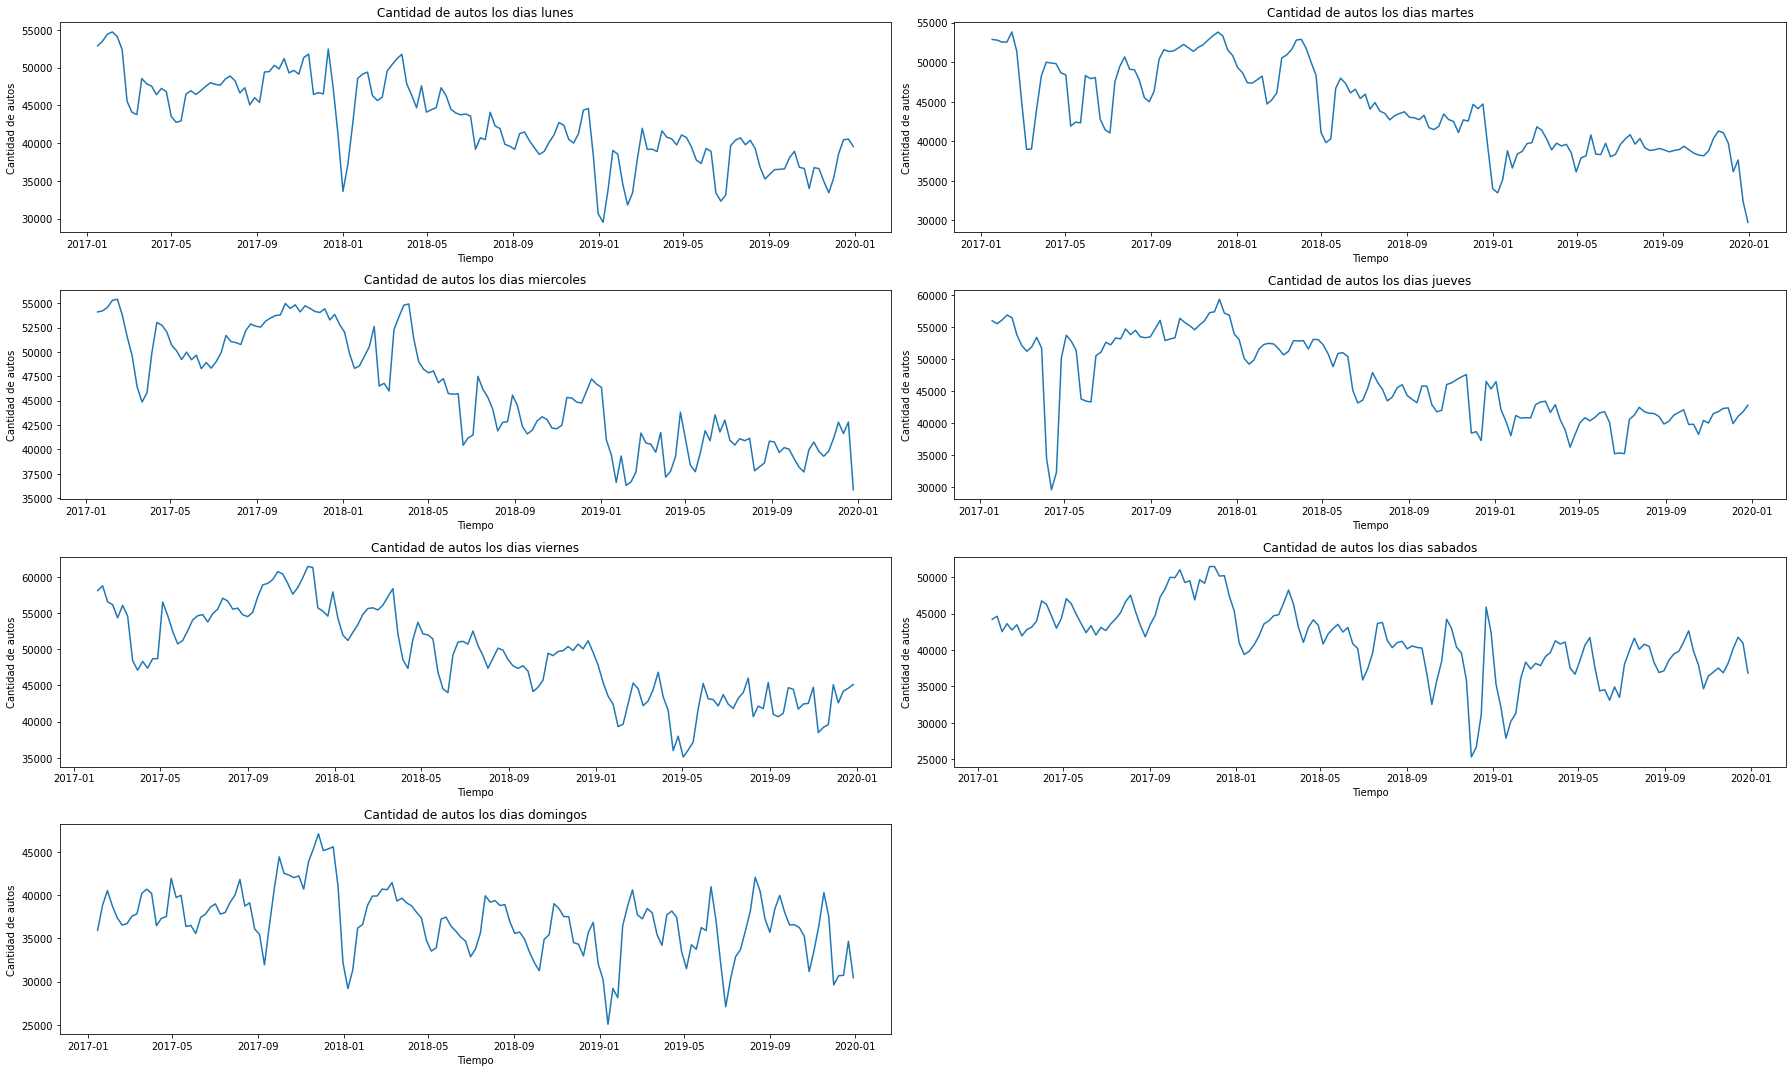

In [ ]:
#Se grafica el comportamiento de la variable cantidad de pasos pero con su media movil de 3 periodos para cada dia de la semana

plt.figure(figsize = (25,15))

plt.subplot(4,2,1)
plt.plot(dataset_monday.index, dataset_monday.media_movil)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos')
plt.title('Cantidad de autos los dias lunes')

plt.subplot(4,2,2)
plt.plot(dataset_tuesday.index, dataset_tuesday.media_movil)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos')
plt.title('Cantidad de autos los dias martes')

plt.subplot(4,2,3)
plt.plot(dataset_wednesday.index, dataset_wednesday.media_movil)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos')
plt.title('Cantidad de autos los dias miercoles')

plt.subplot(4,2,4)
plt.plot(dataset_thursday.index, dataset_thursday.media_movil)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos')
plt.title('Cantidad de autos los dias jueves')

plt.subplot(4,2,5)
plt.plot(dataset_friday.index, dataset_friday.media_movil)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos')
plt.title('Cantidad de autos los dias viernes')

plt.subplot(4,2,6)
plt.plot(dataset_saturday.index, dataset_saturday.media_movil)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos')
plt.title('Cantidad de autos los dias sabados')

plt.subplot(4,2,7)
plt.plot(dataset_sunday.index, dataset_sunday.media_movil)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos')
plt.title('Cantidad de autos los dias domingos')

plt.tight_layout()
plt.show()

Se puede observar en los graficos en suavizado que se logro.

In [ ]:
#Modelos de benchmark con la media movil de 3 periodos

days = ['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado', 'Domingo']
modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']

for i, day in enumerate([dataset_monday, dataset_tuesday, dataset_wednesday, dataset_thursday, dataset_friday, dataset_saturday, dataset_sunday]):
  X=day['fecha_numeros']
  y=day['media_movil']

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

  linear_model = LinearRegression()
  knn_regressor = KNeighborsRegressor()
  tree_regressor = DecisionTreeRegressor()

  linear_model.fit(X_train.values.reshape(-1, 1), y_train)
  knn_regressor.fit(X_train.values.reshape(-1, 1), y_train)
  tree_regressor.fit(X_train.values.reshape(-1, 1), y_train)

  print('Modelos con el dataset del dia '+days[i]+':')

  for j, model in enumerate([linear_model, knn_regressor, tree_regressor]):
    print(f'Modelo: {modelos[j]}')
    print('Score del train: '+str(model.score(X_train.values.reshape(-1, 1), y_train)))
    print('Score del test: '+str(model.score(X_test.values.reshape(-1, 1),y_test))+'\n')

Modelos con el dataset del dia Lunes:
Modelo: Regresión lineal
Score del train: 0.6266872571264754
Score del test: 0.6136231794660109

Modelo: Árbol de Decisión
Score del train: 0.8502116998983689
Score del test: 0.679606360921107

Modelo: Vecinos más cercanos
Score del train: 1.0
Score del test: 0.7611363440932527

Modelos con el dataset del dia Martes:
Modelo: Regresión lineal
Score del train: 0.5387456109565975
Score del test: 0.6764730232753009

Modelo: Árbol de Decisión
Score del train: 0.8888294706003627
Score del test: 0.773104662617998

Modelo: Vecinos más cercanos
Score del train: 1.0
Score del test: 0.8163128586071786

Modelos con el dataset del dia Miercoles:
Modelo: Regresión lineal
Score del train: 0.6935855620389312
Score del test: 0.752069735982767

Modelo: Árbol de Decisión
Score del train: 0.9306975859029436
Score del test: 0.8491299346684413

Modelo: Vecinos más cercanos
Score del train: 1.0
Score del test: 0.8440665522162918

Modelos con el dataset del dia Jueves:
Mo

Se puede evidenciar que los reusltados son mucho mas prometedores para la parte de test. Se valida que un suavizado mediante la media movil es muy buen aporte para series de tiempo.

# **Trabajos futuros**

Se plantea que para desarrollos futuros del proyecto, se pueda seguir trabajando con los metodos de suavizados sobre series de tiempo, para tal caso se plantea un suavizado mediant medias exponenciales, que puede llegar a eliminar mucho ruido y tener una buena aproximacion al comportamiento de la serie, una vez se realice este proceso, se plantea predecir el comportamiento de la cantidad de pasos a los dias de la semana e incluso se plantea tomar una muestra distinta, en la que se pueda agrupar comporamientos semanales pero sin discrimnar dias, y lograr obtener una serie con menos ruido y poder predecir el comporamiento de la siguientes semanas.
Y como una consigna siguiente puede ser el comportamiento mensual tomando mas años de datos para tener una buena muestra.
Todo esto repito mediante el proceso de media movil exponencial.